I am an experimental high energy physicist (till next month, April 2019). Last 10 years I basically worked on the scientific data analyses (as a student at Syracuse University and as a Postdoctoral Research Associate at University of Cincinnati and Brookhaven National Laboratory) to understand the matter antimatter asymmetry in the early universe. The  data I used are the data collected at CERN's LHCb experiment and KEK's Belle experiment. My publication list can be found  [here](https://inspirehep.net/author/profile/Bilas.K.Pal.1).  

I recently find that the Real World Data Analysis in Data Science is more interesting than the Abstract Data Analysis in Particle Physics experiment. Also the opportunity is less in Academia. Beacuse of the big opportunities in Data Science, I decided to switch my career. 

Here I did a simple Data analysis to understand the Data Science job Market in US. This is not an original Analysis, the data set is downloaded from Kaggle. And the entries are about six months old. However it still tells the current trend of Data Science Job Market in US. Some of my friend may be benifited from this analysis. 

### Initial Libraries

In [1]:
import pandas as pd # linear algebra
import numpy as np # data processing
import matplotlib.pyplot as plt #plot
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

### About the Data Set

Data set is downloaded from [Kaggle](https://www.kaggle.com/sl6149/data-scientist-job-market-in-the-us). 

In [2]:
df = pd.read_csv('data-scientist-job-market-in-the-us/alldata.csv')
df.head(3)

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
position       6953 non-null object
company        6953 non-null object
description    6953 non-null object
reviews        5326 non-null float64
location       6953 non-null object
dtypes: float64(1), object(4)
memory usage: 272.1+ KB


From the data information we see that there are 11 rows with all NaN. It is better to remove these entires. 

In [4]:
df['reviews'] = df['reviews'].fillna(0) #replaces NaN with 0.0
df = df.dropna(axis=0, how = 'any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 0 to 6963
Data columns (total 5 columns):
position       6953 non-null object
company        6953 non-null object
description    6953 non-null object
reviews        6953 non-null float64
location       6953 non-null object
dtypes: float64(1), object(4)
memory usage: 325.9+ KB


In [5]:
df.head(3)

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA"


Let's first look the locations of JOB positions. Many of the locations include Zipcode, which we are not interested to explore. Let's remove them.

In [8]:
Cities = df['location'].unique()
Cities[0:3]

array(['Atlanta, GA 30301 ', 'Atlanta, GA', 'Atlanta, GA 30303 '],
      dtype=object)

In [31]:
import re #Regular Expression Syntax
df['newlocation'] = [re.sub('[\s*]+[\d]+[\d]+[\d]+[\d]+[\d]','',row) for row in df['location']]
df['newlocation'] = [str(row).rstrip() for row in df['newlocation']]

In [36]:
df['newlocation'].unique()

array(['Atlanta, GA', 'Austin, TX', 'Round Rock, TX', 'Cedar Park, TX',
       'Boulder, CO', 'Boston, MA', 'Chicago, IL', 'Washington, DC',
       'Los Angeles, CA', 'Cambridge, MA', 'Mountain View, CA',
       'Manhattan, NY', 'New York, NY', 'Jersey City, NJ', 'Newark, NJ',
       'Oakland, NJ', 'Bronx, NY', 'Hoboken, NJ', 'Brooklyn, NY',
       'Rutherford, NJ', 'Union, NJ', 'Rahway, NJ', 'Murray Hill, NJ',
       'South Plainfield, NJ', 'Queens, NY', 'Little Falls, NJ',
       'Florham Park, NJ', 'Troy Hills, NJ', 'Bloomfield, NJ',
       'Lynbrook, NY', 'Allendale, NJ', 'Parsippany, NJ',
       'West Orange, NJ', 'Kenilworth, NJ', 'Ridgefield, NJ',
       'Harrison, NY', 'Montclair, NJ', 'Fort Lee, NJ', 'Carlstadt, NJ',
       'Orangeburg, NY', 'Fairfield, NJ', 'Palisades, NY',
       'Hackensack, NJ', 'Roseland, NJ', 'East Hanover, NJ',
       'Long Beach, NY', 'Whippany, NJ', 'Manhasset, NY', 'Yonkers, NY',
       'New Hyde Park, NY', 'Secaucus, NJ', 'Port Washington, NY',
    

It will be interesting to know ahead the top cities with many data science related jobs. Below is the plot of top 15 cities in the data set. Great to know that many jobs in New York, where I am currently living.

In [66]:
df['newlocation'].value_counts().head(15)

New York, NY         848
Seattle, WA          777
Cambridge, MA        694
Boston, MA           629
San Francisco, CA    564
Chicago, IL          471
San Diego, CA        412
Washington, DC       340
Mountain View, CA    277
Atlanta, GA          269
Sunnyvale, CA        256
Los Angeles, CA      254
Boulder, CO          251
Austin, TX           213
Redmond, WA          158
Name: newlocation, dtype: int64

In [37]:
import seaborn as sns

Text(0.5, 1.0, 'Top Cities with DS Job')

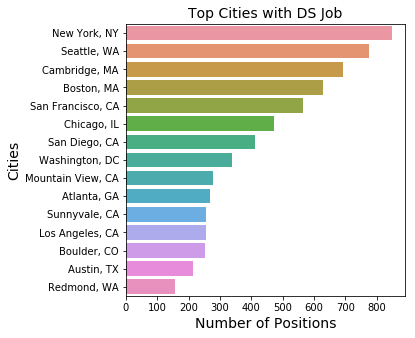

In [101]:
fig,ax=plt.subplots(figsize=(5,5)) 
sns.barplot(x=df.newlocation.value_counts()[:15]\
            .values,y=df.newlocation.value_counts()[:15]\
            .index.values,orient='h')
ax.set_xlabel('Number of Positions',fontsize=14,color='black')
ax.set_ylabel('Cities',fontsize=14,color='black')   
ax.set_title('Top Cities with DS Job',fontsize=14,color='black') 

Let's further divide the location into cities and states to rank the data science job by state.

In [102]:
df['city']  = [re.split(',', row)[0] for row in df['newlocation'] ]
df['state'] = [re.split(',', row)[1] for row in df['newlocation'] ]
df['city'] = [str(row).rstrip() for row in df['city']]
df['state'] = [str(row).rstrip() for row in df['state']]

In [103]:
df['state'].value_counts()

 CA    2152
 MA    1323
 WA     935
 NY     926
 IL     471
 DC     340
 GA     269
 CO     251
 TX     218
 NJ      68
Name: state, dtype: int64

Text(0.5, 0, 'States')

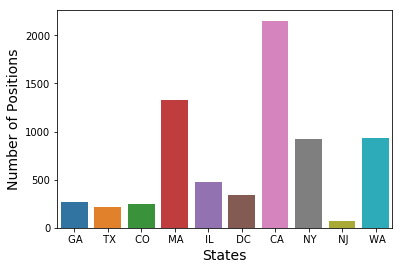

In [104]:
fig,ax=plt.subplots() 
sns.countplot(df['state'])
ax.set_ylabel('Number of Positions',fontsize=14)
ax.set_xlabel('States',fontsize=14)   

Although New York city has lot of DS jobs, but there are lot of opportunities in other states too, for example, CA, MA, WA, IL states (basically states with big cities).

Let's now look for the top companies who hire Data Scientist.

In [105]:
df['company'].value_counts().head(25)

Amazon.com                                358
Ball Aerospace                            187
Microsoft                                 137
Google                                    134
NYU Langone Health                         77
Fred Hutchinson Cancer Research Center     70
KPMG                                       66
Lab126                                     50
Broad Institute                            49
Facebook                                   49
Walmart eCommerce                          45
McKinsey & Company                         41
Takeda Pharmaceutical                      39
Harnham                                    39
University of Washington                   39
Celgene Corporation                        34
Pharmacyclics, an Abbvie Company           34
Oath Inc                                   34
Cymer                                      32
Brigham & Women's Hospital(BWH)            31
Biogen                                     30
Sanofi                            

Text(0.5, 1.0, 'Top Companies who hire Data Scientists')

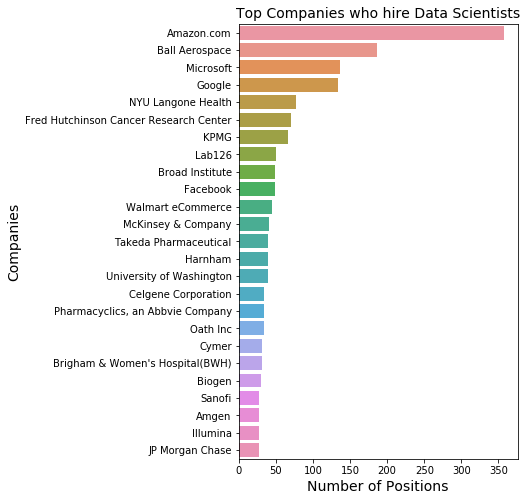

In [106]:
fig,ax=plt.subplots(figsize=(5,8)) 
sns.barplot(x=df.company.value_counts()[:25]\
            .values,y=df.company.value_counts()[:25]\
            .index.values,orient='h')
ax.set_xlabel('Number of Positions',fontsize=14)
ax.set_ylabel('Companies',fontsize=14)   
ax.set_title('Top Companies who hire Data Scientists',fontsize=14) 

After we know about the companies, let's now look for the top roles.

In [120]:
df['position'].value_counts().head(25)

Data Scientist                         351
Senior Data Scientist                   96
Research Analyst                        64
Data Engineer                           60
Machine Learning Engineer               56
Lead Data Scientist                     31
Research Scientist                      30
Sr. Data Scientist                      28
Principal Data Scientist                24
Data Analyst                            22
Software Engineer                       22
Quantitative Analyst                    21
Scientist                               17
Product Manager                         17
Bioinformatics Scientist                16
Market Research Analyst                 15
Senior Software Engineer                14
Machine Learning Scientist              13
Software Engineer, Machine Learning     13
Senior Data Engineer                    12
Senior Research Analyst                 12
Senior Scientist                        11
Associate Scientist                     11
Software De

Next I would like to know:
- what skills are required?
- what degrees (Bachlor, MS, PhD, ...) / majors are in the top for Data Science Jobs?

To answer these question I need more experience on Natural Language procesing. I know the anwsers, but I would like to answer these question in pythonic way by utlizing the skills I am learning.
This notebook will be updated soon.
